# Линейная регрессия

$$
p_i = x_i\ @\ W\ +\ b = x_{i1}*w_1 + x_{i2}*w_2 + ... + x_{iD}*w_D + b
$$

$$
MSE(p_{batch}, y_{true}) = \frac{1}{|p_{batch}|} * \sum_{i}(y_i - p_i)^2
$$

$$
MSE(W) = \frac{1}{N} * <Y - XW - b, Y-XW - b>
$$

In [1]:
from Part_2_functions import *

In [104]:
from typing import Tuple, Dict

def forward_linear_regression(X_batch: np.ndarray, y_batch: np.ndarray, W: np.ndarray, B: np.array)-> \
Tuple[float, Dict[str, np.ndarray]]:
    
    assert_mulShape(X_batch, W)
    assert X_batch.shape[0] == y_batch.shape[0], 'amount of objects in X and Y should be the same'
    P = (X_batch @ W) + B
    loss = np.mean((y_batch - P.flatten())**2)
    forward_info = {}
    forward_info['X'] = X_batch
    forward_info['y'] = y_batch
    forward_info['P'] = P
    return loss, forward_info

$$
\frac{dLoss}{dW} = \frac{dLoss}{dP}(p, y) * \frac{d\alpha}{dN}(N, B) * \frac{d\nu}{dW}(X, W)
$$

$$
Loss(P, Y) = \frac{1}{N} \sum_{i=1}^{N} (Y_i - P_i)^2
$$
$$
\nabla_P Loss = \frac{2}{N} * X^T*(P - Y)
$$

In [105]:
def backward_linear_regression(forward_info: Dict[str, np.ndarray], 
                              W: np.ndarray, B: np.float32) -> Dict[str, np.ndarray]:
    X = forward_info['X']
    P = forward_info['P']
    y = forward_info['y'].reshape(-1, 1)
    N = len(P)
    
    # Вычисляем ошибку
    err = P - y
    
    # Вычисляем градиент для весов W
    grad_W = X.T @ err * 2 / N
    
    # Вычисляем градиент для смещения B
    grad_B = np.sum(err) * 2 / N
    
    return {'W': grad_W, 'B': grad_B}

In [106]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california = fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, random_state=10)

In [107]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [108]:
def learn(W: np.ndarray, B: np.ndarray, x_train: np.ndarray, y_train: np.ndarray, lr = 0.01):
    for s in range(100):
        loss, forward_info = forward_linear_regression(x_train, y_train, W, B)
        backward_info = backward_linear_regression(forward_info, W, B)
        W -= lr * backward_info['W']
        B -= lr * backward_info['B']
        print(f'Iter {s}: loss = {loss:.6f}')

In [110]:
np.random.seed(10)
W = np.random.randn(x_train.shape[1], 1)
B = np.random.randn(1)
learn(W, B, x_train, y_train)

Iter 0: loss = 7.953301
Iter 1: loss = 7.590757
Iter 2: loss = 7.248375
Iter 3: loss = 6.924912
Iter 4: loss = 6.619205
Iter 5: loss = 6.330173
Iter 6: loss = 6.056802
Iter 7: loss = 5.798148
Iter 8: loss = 5.553328
Iter 9: loss = 5.321517
Iter 10: loss = 5.101944
Iter 11: loss = 4.893889
Iter 12: loss = 4.696676
Iter 13: loss = 4.509674
Iter 14: loss = 4.332293
Iter 15: loss = 4.163980
Iter 16: loss = 4.004216
Iter 17: loss = 3.852517
Iter 18: loss = 3.708426
Iter 19: loss = 3.571519
Iter 20: loss = 3.441394
Iter 21: loss = 3.317675
Iter 22: loss = 3.200012
Iter 23: loss = 3.088072
Iter 24: loss = 2.981545
Iter 25: loss = 2.880138
Iter 26: loss = 2.783578
Iter 27: loss = 2.691606
Iter 28: loss = 2.603979
Iter 29: loss = 2.520469
Iter 30: loss = 2.440860
Iter 31: loss = 2.364950
Iter 32: loss = 2.292547
Iter 33: loss = 2.223473
Iter 34: loss = 2.157556
Iter 35: loss = 2.094638
Iter 36: loss = 2.034567
Iter 37: loss = 1.977201
Iter 38: loss = 1.922405
Iter 39: loss = 1.870051
Iter 40: l

In [98]:
def predict(X: np.array, W:np.array, b: np.float64):
    return (X @ W + b).flatten()

In [99]:
from sklearn.metrics import mean_squared_error

print('Train MSE:', mean_squared_error(y_train, predict(x_train, W, B)))
print('Train MSE:', np.mean((predict(x_train, W, B) - y_train)**2))
print('Test MSE:', mean_squared_error(y_test, predict(x_test, W, B)))

Train MSE: 0.7594182472104108
Train MSE: 0.7594182472104108
Test MSE: 0.875402612033664


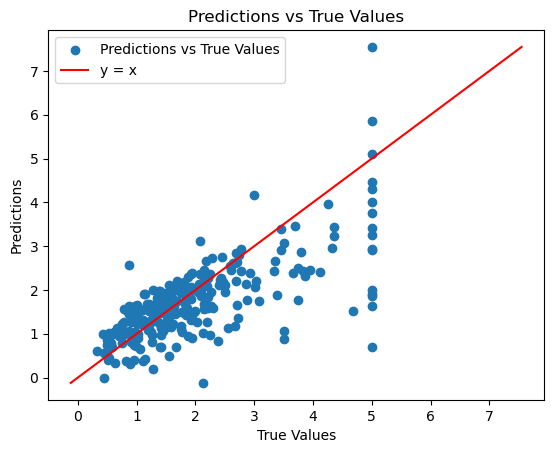

In [100]:
import matplotlib.pyplot as plt

# Вычисляем предсказания
y_pred = predict(x_test, W, B)[::20]

# Создаем график scatter plot
plt.scatter(y_test[::20], y_pred, label='Predictions vs True Values')

# Определяем диапазон для линии y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Добавляем линию y = x
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='y = x')

# Добавляем легенду и метки осей
plt.legend()
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')

# Показываем график
plt.show()

In [101]:
np.round(W.flatten(), 4)

array([ 1.2256,  0.3412, -0.8145,  0.724 ,  0.1667, -0.1489,  0.1584,
        0.1329])

In [102]:
main_feature = np.argsort(abs(W.flatten()))[-1]

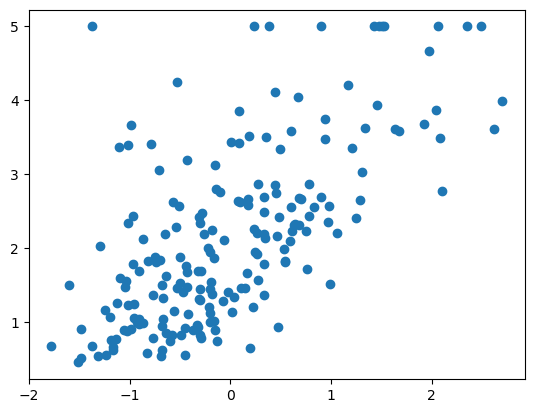

In [103]:
plt.scatter(x_train[:, main_feature][::80], y_train[::80])